# Generative Adverserial Network

In [7]:
import jax
import haiku as hk
from utils import *
from model_gan import *
import copy
import flax.linen as nn

## Shared Configuration

In [8]:
config_shared = {}
config_shared['epochs'] = 100
config_shared['batch_size'] = 128
config_shared['d_learning_rate'] = 1e-3
config_shared['g_learning_rate'] = 1e-3
config_shared['d_layer_dim'] = [30, 20, 10, 1]
config_shared['g_layer_dim'] = [16, 8, 4, 2]
config_shared['latent_dim'] = 10
config_shared['d_activation'] = nn.relu
config_shared['g_activation'] = nn.relu
config_shared['k'] = 1  # Discriminator training iterations
prng_seq = hk.PRNGSequence(jax.random.PRNGKey(0))

## Checkerboard Dataset

### Training

In [15]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 2000
config['batch_size'] = 32
config['d_learning_rate'] = 5e-3
config['g_learning_rate'] = 1e-3
config['d_layer_dim'] = [30, 20, 10, 1]
config['g_layer_dim'] = [16, 8, 4, 2]
config['latent_dim'] = 20
config['d_activation'] = nn.relu
config['g_activation'] = nn.relu
config['k'] = 1

In [16]:
# Load dataset and train model
dataset_name = 'checkerboard'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, losses = train_model(model, config, X_train, X_test)
save_losses('gan', dataset_name, losses)

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch: 100%|██████████| 2000/2000 [00:15<00:00, 129.52it/s]


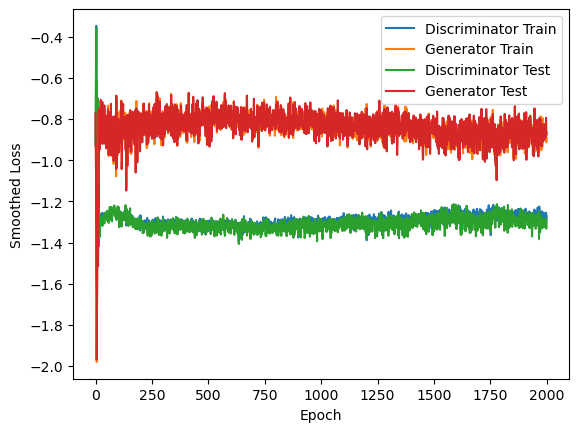

In [20]:
plot_losses(losses)

### Analysis

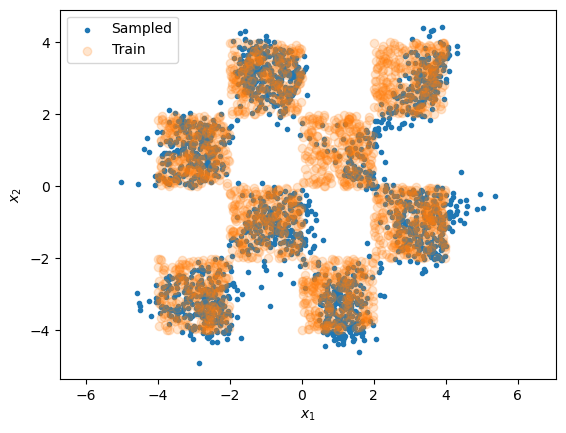

In [23]:
# Sample model
samples = sample_model(model, params, config, next(prng_seq), 2000)
save_samples('gan', dataset_name, samples)
plot_data(X_train, samples)

In [24]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -4.111063458111411


## Gaussian Mixture Dataset

### Training

In [28]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 1000
config['batch_size'] = 256
config['d_learning_rate'] = 1e-2
config['g_learning_rate'] = 1e-4
config['d_layer_dim'] = [30, 20, 10, 1]
config['g_layer_dim'] = [16, 8, 4, 2]
config['latent_dim'] = 20
config['d_activation'] = nn.relu
config['g_activation'] = nn.relu
config['k'] = 1

In [29]:
dataset_name = 'gaussian_mixture'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, losses = train_model(model, config, X_train, X_test)
save_losses('gan', dataset_name, losses)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 100%|██████████| 1000/1000 [00:09<00:00, 106.78it/s]


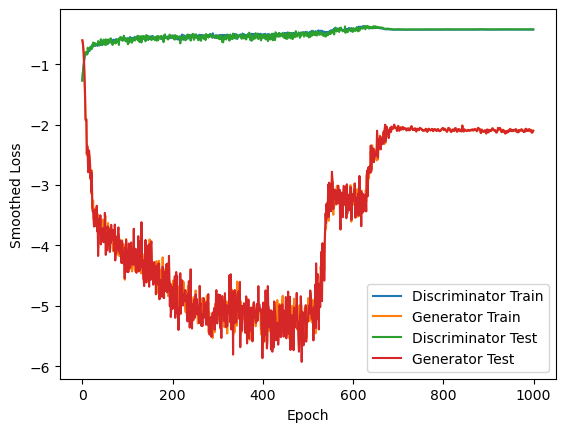

In [30]:
plot_losses(losses)

### Analysis

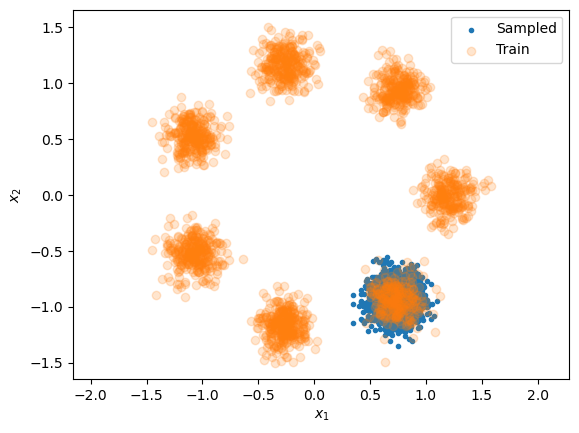

In [31]:
# Sample model
samples = sample_model(model, params, config, next(prng_seq), 2000)
save_samples('gan', dataset_name, samples)
plot_data(X_train, samples)

In [32]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -873.5403119564281


## Pinwheel Dataset

### Training

In [41]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 2500
config['batch_size'] = 128
config['d_learning_rate'] = 1e-3
config['g_learning_rate'] = 1e-4
config['d_layer_dim'] = [30, 20, 10, 1]
config['g_layer_dim'] = [16, 8, 4, 2]
config['latent_dim'] = 10
config['d_activation'] = nn.leaky_relu
config['g_activation'] = nn.relu
config['k'] = 1

In [42]:
# Load dataset and train model
dataset_name = 'pinwheel'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, losses = train_model(model, config, X_train, X_test)
save_losses('gan', dataset_name, losses)

Epoch: 100%|██████████| 2500/2500 [00:32<00:00, 77.74it/s]


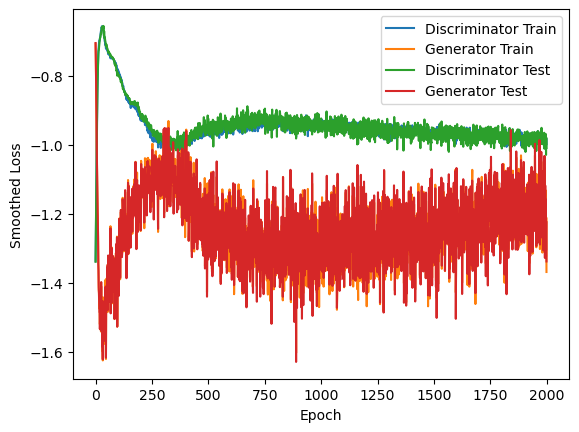

In [44]:
plot_losses(losses)

### Analysis

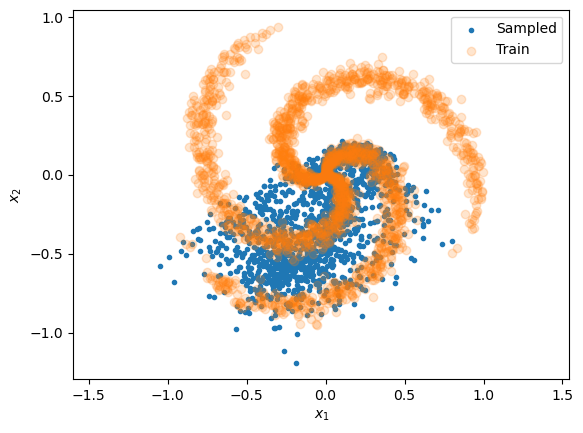

In [40]:
# Sample model
samples = sample_model(model, params, config, next(prng_seq), 2000)
save_samples('gan', dataset_name, samples)
plot_data(X_train, samples)

In [46]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -7.80766875468941


## Spiral Dataset

### Training

In [25]:
# Create customized config
config = copy.deepcopy(config_shared)
config['epochs'] = 1000
config['batch_size'] = 32
config['d_learning_rate'] = 1e-3
config['g_learning_rate'] = 1e-3
config['d_layer_dim'] = [30, 20, 10, 1]
config['g_layer_dim'] = [16, 8, 4, 2]
config['latent_dim'] = 20
config['d_activation'] = nn.leaky_relu
config['g_activation'] = nn.relu
config['k'] = 1

In [26]:
# Load dataset and train model
dataset_name = 'spiral'
X_train, X_test = load_dataset(dataset_name)
model = create_model(config)
params, losses = train_model(model, config, X_train, X_test)
save_losses('gan', dataset_name, losses)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 100%|██████████| 1000/1000 [00:48<00:00, 20.45it/s]


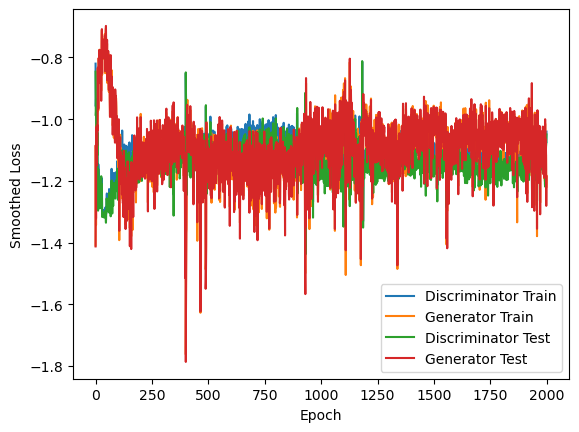

In [28]:
plot_losses(losses)

### Analysis

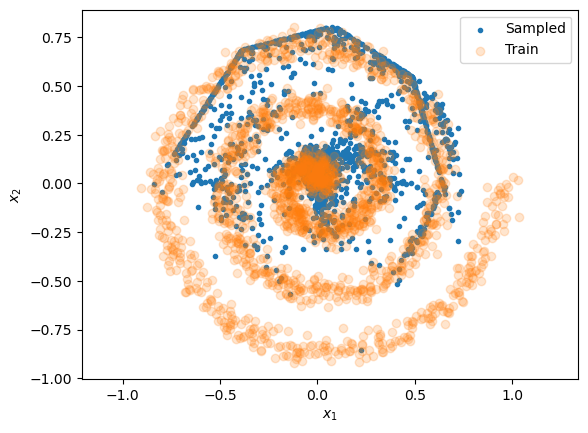

In [29]:
# Sample model
samples = sample_model(model, params, config, next(prng_seq), 2000)
save_samples('gan', dataset_name, samples)
plot_data(X_train, samples)

In [30]:
# Compute estimated mean log likelihood for quantitative comparison
log_likelihood = compute_mean_log_likelihood(samples, X_test)
print('Mean log likelihood:', log_likelihood)

Mean log likelihood: -1.8159824877298134
